### Data Loading

In [16]:
import pandas as pd

top10 = pd.read_csv('top10s.csv', encoding='ISO-8859-1')
# data cleaning: clear the data with popularity = 0
top10 = top10[top10['pop'] != 0]
top10.head(5)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


### The popularity of artist over 2010S

In [17]:
# calculate the popularity of the artists

art_pop = {}

for index, row in top10.iterrows():
    if row['artist'] not in art_pop:
        art_pop[row['artist']] = row['pop']
    else:
        art_pop[row['artist']] += row['pop']

art_pop

{'Train': 83,
 'Eminem': 147,
 'Kesha': 611,
 'Lady Gaga': 964,
 'Bruno Mars': 936,
 'Justin Bieber': 1150,
 'Taio Cruz': 110,
 'OneRepublic': 609,
 'Alicia Keys': 333,
 'Rihanna': 981,
 'Flo Rida': 150,
 'Mike Posner': 214,
 'Far East Movement': 72,
 'Usher': 124,
 'Sean Kingston': 71,
 'The Black Eyed Peas': 330,
 'Adam Lambert': 125,
 'Maroon 5': 1123,
 'Neon Trees': 139,
 'Selena Gomez & The Scene': 140,
 'Enrique Iglesias': 276,
 'Katy Perry': 1056,
 'Britney Spears': 497,
 '3OH!3': 62,
 'David Guetta': 574,
 'Christina Aguilera': 356,
 'Florence + The Machine': 162,
 'Shakira': 168,
 'Tinie Tempah': 104,
 'T.I.': 98,
 'Christina Perri': 199,
 'Adele': 615,
 'Pitbull': 638,
 'Beyoncï¿½': 530,
 'Hot Chelle Rae': 75,
 'Avril Lavigne': 135,
 'Kanye West': 73,
 'LMFAO': 139,
 'Jessie J': 202,
 'Jennifer Lopez': 559,
 'Chris Brown': 215,
 'Sleeping At Last': 46,
 'Nicki Minaj': 269,
 'P!nk': 330,
 'Coldplay': 235,
 'One Direction': 488,
 'Taylor Swift': 568,
 'Carly Rae Jepsen': 320,
 

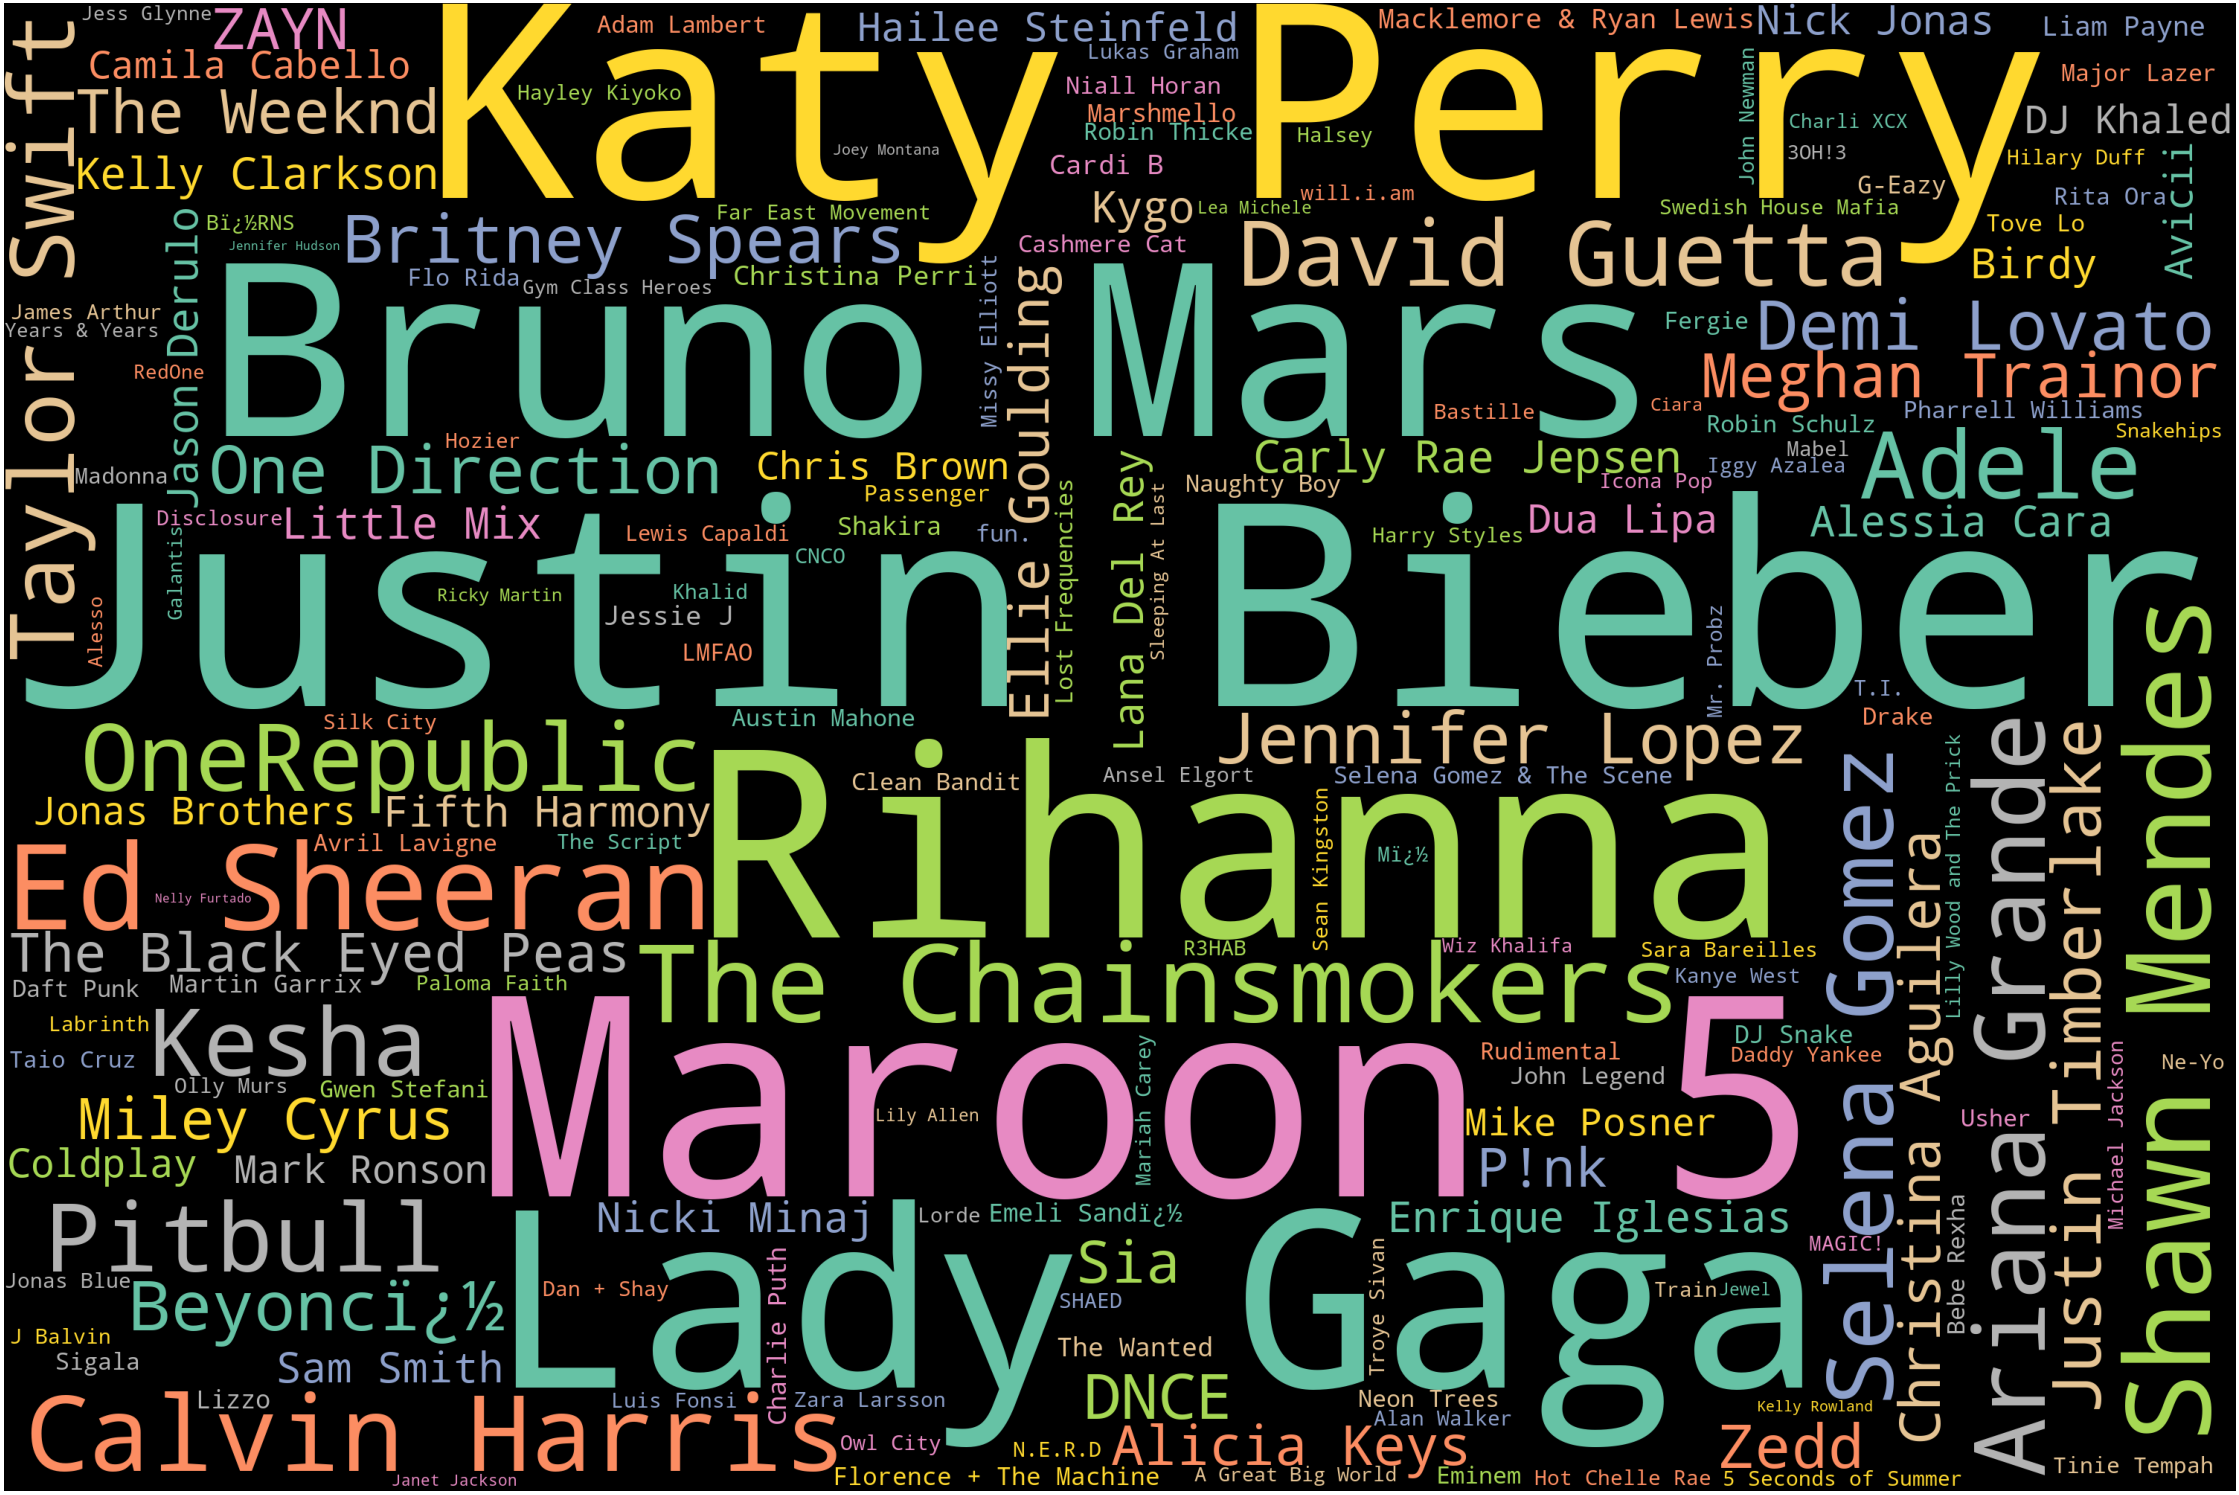

In [18]:
# draw the word cloud graph

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False).generate_from_frequencies(art_pop)

plot_cloud(wordcloud)
wordcloud.to_file('3.png')

### The popularity of genres over 2010S

In [19]:
# calculate the popularity of each genre
genre_pop = {}

# accumulate the popularity of the songs for a specfic genre
for index, row in top10.iterrows():
    if row['top genre'] not in genre_pop:
        genre_pop[row['top genre']] = row['pop']
    else:
        genre_pop[row['top genre']] += row['pop']

# rank the dictionary according to the popularity
genre_pop = dict(sorted(genre_pop.items(), key=lambda x:x[1], reverse=True))
genre_pop

{'dance pop': 21047,
 'pop': 4490,
 'canadian pop': 2456,
 'boy band': 1045,
 'electropop': 1007,
 'barbadian pop': 981,
 'canadian contemporary rnb': 699,
 'british soul': 684,
 'big room': 656,
 'neo mellow': 540,
 'art pop': 502,
 'complextro': 404,
 'edm': 391,
 'australian dance': 374,
 'hip pop': 333,
 'australian pop': 327,
 'hip hop': 280,
 'atl hip hop': 250,
 'latin': 249,
 'permanent wave': 235,
 'tropical house': 215,
 'escape room': 180,
 'brostep': 172,
 'colombian pop': 168,
 'electronic trap': 159,
 'electro': 149,
 'detroit hip hop': 147,
 'canadian hip hop': 147,
 'indie pop': 139,
 'baroque pop': 135,
 'downtempo': 123,
 'belgian edm': 120,
 'acoustic pop': 117,
 'candy pop': 117,
 'folk-pop': 113,
 'alternative rnb': 84,
 'irish singer-songwriter': 81,
 'celtic rock': 80,
 'danish pop': 80,
 'contemporary country': 76,
 'chicago rap': 73,
 'metropopolis': 73,
 'house': 72,
 'australian hip hop': 70,
 'electro house': 70,
 'french indie pop': 58,
 'moroccan pop': 53,

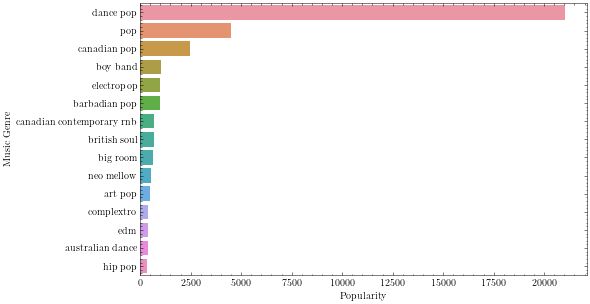

In [20]:
# Visualization of 15 genres that are most popular from 2010 - 2019
import seaborn as sns
import matplotlib.pyplot as plt

COUNT = 15

plt.style.use(['science'])
plt.subplots(1,1,figsize=(8, 5))
sns.barplot(x=list(genre_pop.values())[:COUNT], y=list(genre_pop.keys())[:COUNT])
plt.ylabel('Music Genre')
plt.xlabel('Popularity')
plt.savefig("1.png", dpi=600, bbox_inches='tight')

### The evolution of the genres' popularity over the decade (2010-2019)

In [21]:
import numpy as np

COUNT = 5

# the evolution of popularity of the 5 most popular genres over the decade
# obtain the 5 most popular genres
genre_5 = list(genre_pop.keys())[:COUNT]

# obtain the years for x-axis
x = sorted(list(set(top10['year'].to_list())))

# obtain the popularity for y-axis
y = []
for g in genre_5:
    pop_y = []
    for year in x:
        df = top10[top10['year'] == year]
        df = df[df['top genre'] == g]
        pop_y.append(sum(list(df['pop'])))
        
    y.append(pop_y)
y = np.array(y)


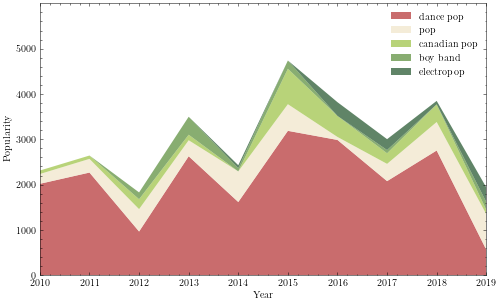

In [22]:
# draw the stack area graph
plt.style.use(['science'])
fig, ax = plt.subplots(1,1,figsize=(8, 5))

ax = plt.gca()
ax.stackplot(x, y, labels=genre_5,alpha=0.8, colors = reversed(["386641","6a994e","a7c957","f2e8cf","bc4749"]))
plt.legend()

# range of axis
plt.xticks(x[::1], fontsize=10, horizontalalignment='center')
plt.xlim(x[0], x[-1])
plt.ylim(0, 5999)

# axis names
plt.ylabel('Popularity')
plt.xlabel('Year')

plt.savefig("2.png", dpi=600, bbox_inches='tight')

### The evolution of music features over the decade (2010 - 2019)

In [23]:
# Normalize the music features
def minmax_norm(df_in):
    return (df_in - df_in.min()) / (df_in.max() - df_in.min())

for index, row in top10.iloc[:, 5:-1].iteritems():
    top10[index] = minmax_norm(row)

top10.head(5)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,0.331288,0.904255,0.594595,0.846154,0.083333,0.808511,0.286207,0.191919,0.022222,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,0.269939,0.946809,0.702703,0.769231,0.694444,0.638298,0.444828,0.242424,0.444444,82
2,3,TiK ToK,Kesha,dance pop,2010,0.472393,0.851064,0.716216,0.923077,0.375000,0.712766,0.227586,0.101010,0.244444,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,0.466258,0.936170,0.635135,0.846154,0.083333,0.712766,0.555172,0.000000,0.022222,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,0.404908,0.851064,0.554054,0.769231,0.097222,0.414894,0.300000,0.020202,0.022222,78


In [24]:
# calculate the mean value of the music features for each year (2010-2019)
features_dict = {}

years = sorted(list(set(top10['year'].to_list())))
features = list(top10.columns)[5:-1]

for year in years:
    features_dict[year] = {}
    df = top10[top10['year'] == year]
    for feature in features:
        f_ = list(df[feature])
        features_dict[year][feature] = sum(f_)/len(f_)

features_dict

{2010: {'bpm': 0.48429447852760715,
  'nrgy': 0.7819148936170217,
  'dnce': 0.5605405405405404,
  'dB': 0.7738461538461539,
  'live': 0.2694444444444445,
  'val': 0.5663829787234042,
  'dur': 0.3330344827586207,
  'acous': 0.1195959595959596,
  'spch': 0.13333333333333333},
 2011: {'bpm': 0.46672068526449806,
  'nrgy': 0.754114813327981,
  'dnce': 0.549209586945436,
  'dB': 0.7677793904209,
  'live': 0.26310272536687634,
  'val': 0.5287033319951826,
  'dur': 0.3743656473649966,
  'acous': 0.1347436630455498,
  'spch': 0.14800838574423475},
 2012: {'bpm': 0.48033201010465554,
  'nrgy': 0.75531914893617,
  'dnce': 0.5794912559618441,
  'dB': 0.7760180995475116,
  'live': 0.18831699346405228,
  'val': 0.6367334167709635,
  'dur': 0.3085192697768763,
  'acous': 0.050505050505050504,
  'spch': 0.0633986928104575},
 2013: {'bpm': 0.48267519225784145,
  'nrgy': 0.7433323344321249,
  'dnce': 0.5275980205557669,
  'dB': 0.7583965330444202,
  'live': 0.24608763693270738,
  'val': 0.5232244531015

In [25]:
# full names of music features
features_fname = ['bpm', 'energy', 'dance', 'dB', 'liveness', 'valence', 'duration', 'acoustic', 'speech']

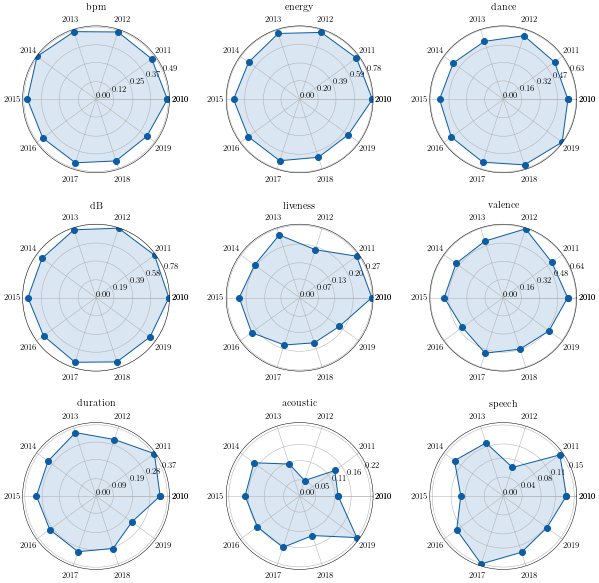

In [26]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['science'])
plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace = 0.35, hspace = 0.35)

years = sorted(list(set(top10['year'].to_list())))
names = np.append(years, [years[0]])

for i in range(len(features)):
    ax = plt.subplot(3, 3, i+1, polar=True)
    values = [features_dict[k][features[i]] for k, v in features_dict.items()]
    
    angles = np.linspace(0, 2*np.pi, len(values),endpoint=False)

    values = np.append(values, [values[0]])
    angles = np.append(angles, [angles[0]])

    ax.set_title(features_fname[i], fontsize=10)

    plt.plot(angles, values, marker='o')
    plt.fill(angles, values, alpha=0.15)
    plt.xticks(angles, names, fontsize=8)
    y_tick = [round(i, 2) for i in list(range(0, 5) * max(values) / 4)]
    plt.yticks(y_tick, fontsize=8)
    

plt.savefig("4.png", dpi=600, bbox_inches='tight')

### The relationship of music genres over decades (2010 - 2019)

In [27]:
from scipy import spatial

COUNT = 10

# calculate the cosine similarity of music genres for each year according to the music features
# genre similarity
def get_cos_similar_matrix(vec1, vec2):
    cos_sim = 0.5 + 0.5 * (1 - spatial.distance.cosine(vec1, vec2))
    return cos_sim

genres = list(genre_pop)[:COUNT]
years = sorted(list(set(top10['year'].to_list())))

genre_sim = {}

# initalize
for year in years:
    genre_sim[year] = {}
    for genre in genres:
        genre_sim[year][genre] = [0] * (len(list(top10.columns)[5:-1]) + 1)

for index, row in top10.iterrows():
    if row['top genre'] in genres:
        a = genre_sim[row['year']][row['top genre']]
        b = [x * row[-1] for x in list(row[5:-1])]
        # popularity
        b.append(row[-1])
        genre_sim[row['year']][row['top genre']] = [a[i] + b[i] for i in range(len(a))]
    else:
        continue

for key, value in genre_sim.items():
    for g, l in value.items():
        if l[-1] != 0:
            genre_sim[key][g] = [x / l[-1] for x in l][:-1]
        else:
            genre_sim[key][g] = l[:-1]
genre_sim


{2010: {'dance pop': [0.4948185819308881,
   0.7796232027764007,
   0.5914791836953465,
   0.7759048091224592,
   0.2766966892524652,
   0.6063935273578835,
   0.3218111568905681,
   0.1074302769890276,
   0.13312400154244478],
  'pop': [0.4684730743012952,
   0.8378644602048858,
   0.5693193193193193,
   0.7692307692307693,
   0.15625,
   0.5289105594956659,
   0.30530012771392084,
   0.11994949494949493,
   0.022222222222222223],
  'canadian pop': [0.13496932515337423,
   0.8723404255319148,
   0.6756756756756757,
   0.7692307692307693,
   0.125,
   0.5319148936170213,
   0.27586206896551724,
   0.04040404040404041,
   0.24444444444444446],
  'boy band': [0, 0, 0, 0, 0, 0, 0, 0, 0],
  'electropop': [0, 0, 0, 0, 0, 0, 0, 0, 0],
  'barbadian pop': [0.6598395469561112,
   0.7373977086743045,
   0.4723492723492724,
   0.8461538461538461,
   0.42264957264957265,
   0.396481178396072,
   0.37246684350132625,
   0.07816627816627818,
   0.09042735042735042],
  'canadian contemporary rnb': [0

In [30]:
# create the similarity matrix dataframe
import pandas as pd

genre_sim_list = []
for year in years:
    for i in range(len(genres)):
        for j in range(len(genres)):
            if i != j:
                cos_sim = get_cos_similar_matrix(genre_sim[year][genres[i]], genre_sim[year][genres[j]])
                genre_sim_list.append({'year': year, 'genre_1': genres[i], 'genre_2': genres[j], 'sim': cos_sim})
            else:
                genre_sim_list.append({'year': year, 'genre_1': genres[i], 'genre_2': genres[j], 'sim': 1})

genres_sim_pd = pd.DataFrame(genre_sim_list)
genres_sim_pd.head(5)

,year,genre_1,genre_2,sim
0,2010,dance pop,dance pop,1.000000
1,2010,dance pop,pop,0.996114
2,2010,dance pop,canadian pop,0.979405
3,2010,dance pop,boy band,1.000000
4,2010,dance pop,electropop,1.000000


In [31]:
def create_img(pd_, y):
    plt.style.use(['science'])
    plt.figure(figsize=(8, 5))
    sns.heatmap(data=pd_, cmap='RdBu_r', linewidths=0.3, vmin = round(min(list(genres_sim_pd['sim'])), 1), vmax = 1)
    plt.xticks([])
    plt.xlabel("music genres")
    plt.ylabel("")
    plt.title('Music genre relationship on ' + y)
    plt.savefig('pic5/' + y + '.png', dpi=500)
    plt.close()
    
    return 'pic5/' + y + '.png'

In [46]:
import imageio
import time
import os


filenames = []
for year in years:
    pd_y = genres_sim_pd[genres_sim_pd['year'] == year]
    pd_y = pd_y.pivot(columns="genre_1", index="genre_2", values="sim")
    filenames.append(create_img(pd_y, str(year)))

# print('Creating gif\n')
# with imageio.get_writer(f'4.gif', mode='I') as writer:
#     for filename in filenames:
#         image = imageio.imread(filename)
#         writer.append_data(image)
#         time.sleep(0.6)
# print('Gif saved\n')

frames = []
for image_name in filenames:
    im = imageio.imread(image_name)
    print(im.shape)
    frames.append(im) 
imageio.mimsave('4.gif', frames, 'GIF', fps=1.8, loop=0)

print('Removing Images\n')
# Remove files
for filename in set(filenames):
    os.remove(filename)
print('DONE')

/var/folders/5b/vt40bc0s55v21zwv9__j6ssc0000gn/T/ipykernel_86803/1121288087.py:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(image_name)


(2126, 3785, 4)
(2126, 3785, 4)
(2126, 3785, 4)
(2126, 3785, 4)
(2126, 3785, 4)
(2126, 3785, 4)
(2126, 3785, 4)
(2126, 3785, 4)
(2126, 3785, 4)
(2126, 3785, 4)
Removing Images

DONE
